In [36]:
from scipy.integrate import quad
from numpy import sqrt, sin, cos, pi
import numpy as np
import matplotlib.pyplot as plt

In [60]:
def get_fourier_coeffs(f, L, N=100):
    a_list = []
    b_list = []
    
    for i in range(N):
        if i == 0:
            a_list.append(1/L * (quad(f,0,L))[0])
            b_list.append(0)
        else:
            def a_func(x):
                return (f(x) * cos((2 * np.pi * i * x)/L))
            a_list.append(round((2/L * quad(a_func,0,L)[0]),3))
                          
            def b_func(x):
                return (f(x) * sin((2 * np.pi * i * x)/L))
            b_list.append(round((2/L * quad(b_func,0,L)[0]),3))
    output = [a_list, b_list]
    return output

In [61]:
def test_cosine_sum(x, L=1):
    return 4*cos(2*pi*x/L) - cos(4*pi*x/L) + 2*cos(6*pi*x/L)

In [62]:
get_fourier_coeffs(test_cosine_sum, L=1, N=5)

[[-5.342948306008566e-16, 4.0, -1.0, 2.0, -0.0], [0, -0.0, -0.0, 0.0, -0.0]]

In [32]:
def square_wave(x):
    if 0 <= x < 1:
        return 1
    if 1 <= x < 2:
        return -1

[[0.0, 0.0, -0.0, 0.0, 0.0, 0.0, -0.0, 0.0, 0.0, -0.0, 0.0, 0.0, 0.0, -0.0, 0.0, -0.0, -0.0, -0.0, 0.0, 0.0, -0.0, 0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, 0.0, 0.0, -0.0, -0.0, -0.0, -0.0, -0.0, 0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, -0.0, 0.0, -0.0, 0.0, 0.0, 0.0, -0.0], [0, 1.273, 0.0, 0.424, -0.0, 0.255, 0.0, 0.182, -0.0, 0.141, -0.0, 0.116, 0.0, 0.098, 0.0, 0.085, 0.0, 0.075, 0.0, 0.067, 0.0, 0.061, 0.0, 0.055, 0.0, 0.051, 0.0, 0.047, 0.0, 0.044, -0.0, 0.041, -0.0, 0.039, 0.0, 0.036, 0.0, 0.034, 0.0, 0.033, 0.0, 0.031, 0.0, 0.03, -0.0, 0.028, -0.0, 0.027, -0.0, 0.026]]


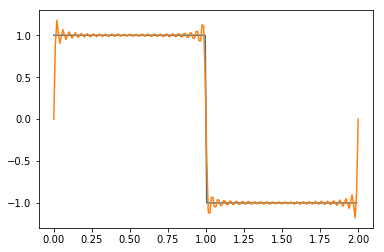

In [70]:
x_vals = np.linspace(0,2,200)

square_wave_list = []
for value in x_vals:
    square_wave_list.append(square_wave(value))
    

N = 50

fourier_coeffs = get_fourier_coeffs(square_wave, L = 2, N = N)

print(fourier_coeffs)

def fourier_partial_series(x,n):
    return fourier_coeffs[0][n] * cos((2 * np.pi * n * x )/2) + fourier_coeffs[1][n] * sin((2 * np.pi * n * x )/2)
    
fourier_list = []
for value in x_vals:
    active_add = 0
    for n in range(N):
        active_add += (fourier_partial_series(value,n))
    fourier_list.append(active_add)
        
plt.plot(x_vals, square_wave_list )
plt.plot(x_vals, fourier_list)